In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
# this allows plots to appear directly in the notebook
%matplotlib inline

## Dataset

| x   | t [s]  |
| --- | ------ |
| 2   | 0.004  |
| 3   | 0.012  |
| 4   | 0.064  |
| 5   | 0.19   |
| 6   | 1.54   |
| 7   | 13.82  |
| 8   | 102    |
| 9   | 913.48 |
| 10  | 8328.9 |

In [2]:
x = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])
t = np.array([0.004, 0.012, 0.064, 0.19, 1.54, 13.82, 102, 913.48, 8328.9])

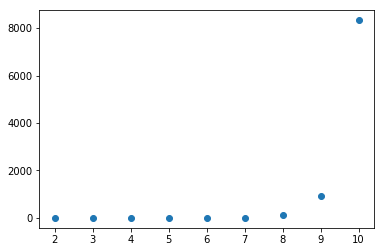

In [3]:
plt.scatter(x, t)
plt.show()

## Exponential regression

* We want to find a function `t = a*e^(b*x)`, i.e. find `a` and `b`.
* Reorder to `log t = bx + log a`
* We apply a linear regression to fit `x` against `log t`

In [4]:
# exponential fit with weighted t
b, a = np.polyfit(x, np.log(t), 1, w=np.sqrt(t))
print(f'a = {a}\nb = {b}')

a = -12.961811377902361
b = 2.1988475869322723


To get an exponential function again, we exponentiate the linear regression `t = b*x + a`

In [5]:
def fn(x):
    return np.exp(b*x + a)

In [6]:
approx_x = np.linspace(2,10.5,100)
approx_t = np.array([fn(x) for x in approx_x])

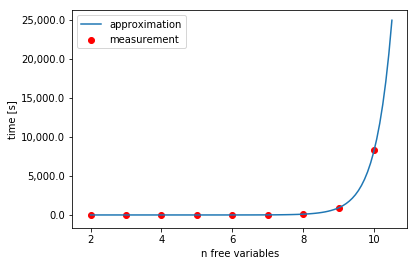

In [7]:
fig, ax = plt.subplots()
plt.plot(approx_x, approx_t, label='approximation')
plt.scatter(x, t, color='red', label='measurement')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(x, ',')))
plt.legend()
plt.xlabel('n free variables')
plt.ylabel('time [s]')
plt.show()

Let's extrapolate a couple of steps

In [8]:
print(f'11: {fn(11) / 3600:3.5} hours')
print(f'12: {fn(12) / 3600 / 24:3.4} days')
print(f'13: {fn(13) / 3600 / 24 / 30:3.4} months')
print(f'14: {fn(14) / 3600 / 24 / 30:3.4} months')
print(f'15: {fn(15) / 3600 / 24 / 356:3.5} years')

11: 20.839 hours
12: 7.827 days
13: 2.352 months
14: 21.2 months
15: 16.107 years
